In [ ]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from matplotlib.ticker import (MultipleLocator,FormatStrFormatter)
from dataclasses import dataclass

In [ ]:
SEED_VALUE = 42
random.seed(SEED_VALUE)
np.random.seed(SEED_VALUE)
tf.random.set_seed(SEED_VALUE)

In [ ]:
(X_train, y_train),( X_test, y_test) = cifar10.load_data()

print(X_train.shape)
print(X_test.shape)

170498071/170498071 [==============================] - 5s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)


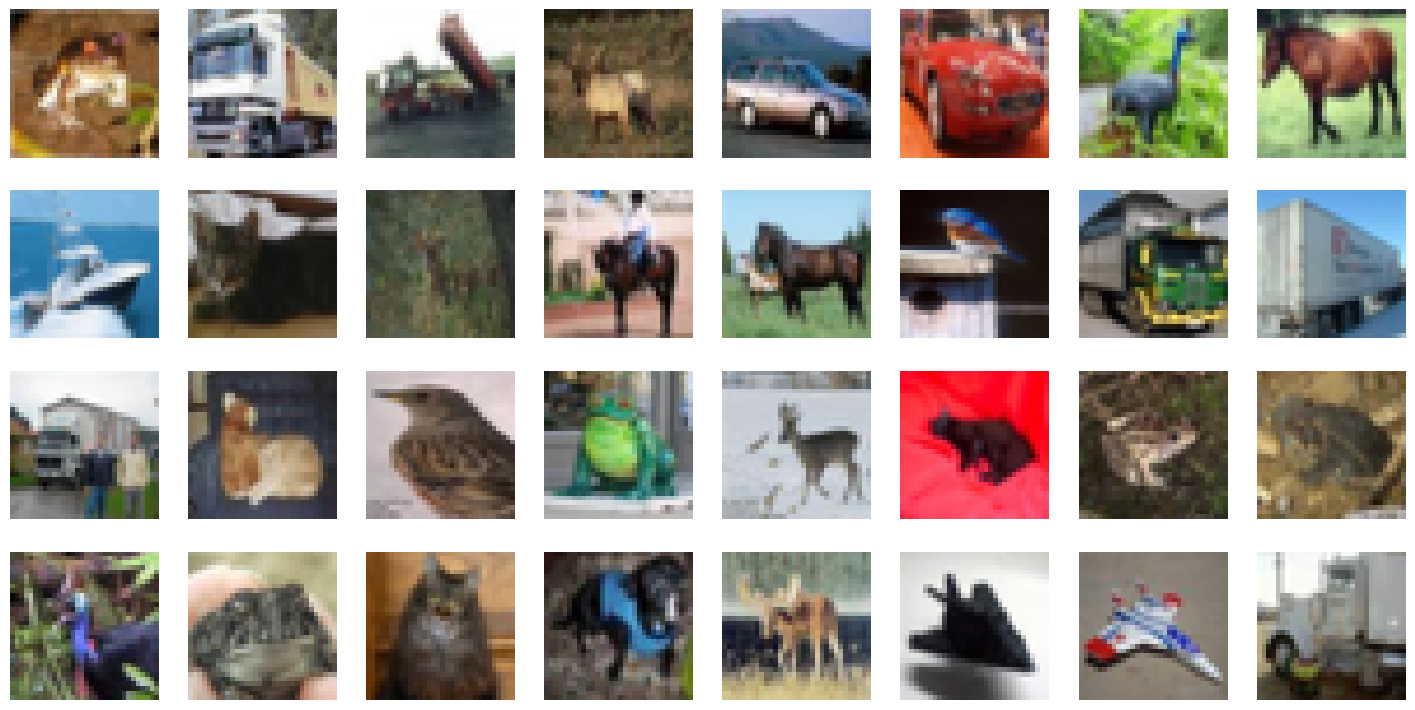

In [ ]:
plt.figure(figsize=(18,9))
num_rows=4
num_cols=8
for i in range(num_rows*num_cols):
  ax=plt.subplot(num_rows,num_cols,i+1)
  plt.imshow(X_train[i,:,:])
  plt.axis('off')

In [ ]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

print('Original (integer) label for the first training sample:',y_train[0])

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print('New (one-hot) label for the first training sample:',y_train[0])

Original (integer) label for the first training sample: [6]
New (one-hot) label for the first training sample: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [ ]:
@dataclass (frozen=True)
class DatasetConfig:
  NUM_CLASSES: int=10
  IMG_HEIGHT: int=32
  IMG_WIDTH: int=32
  NUM_CHANNELS: int=3

@dataclass (frozen=True)
class TrainingConfig:
  EPOCHS: int=5
  BATCH_SIZE: int=256
  LEARNING_RATE: float=0.001

In [ ]:
def cnn_model(input_shape=(32,32,3)):
  model = Sequential()
  model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=input_shape))
  model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
  model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
  model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Flatten())
  model.add(Dense(512,activation='relu'))
  model.add(Dense(10,activation='softmax'))

  return model

In [ ]:
model=cnn_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                   

In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'],
              )

In [ ]:
history = model.fit(X_train,
                   y_train,
                   batch_size=TrainingConfig.BATCH_SIZE,
                   epochs=TrainingConfig.EPOCHS,
                   verbose=1,
                   validation_split=.3,
                   )

Epoch 1/5
137/137 [==============================] - 199s 1s/step - loss: 2.1228 - accuracy: 0.2298 - val_loss: 1.8997 - val_accuracy: 0.2854
Epoch 2/5
137/137 [==============================] - 191s 1s/step - loss: 1.7467 - accuracy: 0.3684 - val_loss: 1.5622 - val_accuracy: 0.4282
Epoch 3/5
137/137 [==============================] - 197s 1s/step - loss: 1.5056 - accuracy: 0.4559 - val_loss: 1.3534 - val_accuracy: 0.5047
Epoch 4/5
137/137 [==============================] - 193s 1s/step - loss: 1.3292 - accuracy: 0.5229 - val_loss: 1.2784 - val_accuracy: 0.5381
Epoch 5/5
137/137 [==============================] - 198s 1s/step - loss: 1.1837 - accuracy: 0.5765 - val_loss: 1.2700 - val_accuracy: 0.5506


In [ ]:
def plot_results(metrics,title=None,ylabel=None,ylim=None, metric_name=None,color=None):
  fig,ax=plt.subplots(figsize=(15,4))
  if not(isinstance(metric_name,list)or isinstance(metric_name,tuple)):
    metrics = [metrics,]
    metric_name=[metric_name,]
  for idx,metric in enumerate(metrics):
    ax.plot(metric,color=color[idx])

  plt.xlabel("Epoch")
  plt.ylabel(ylabel)
  plt.title(title)
  plt.xlim([0,TrainingConfig.EPOCHS-1])
  plt.ylim(ylim)
  ax.xaxis.set_major_locator(MultipleLocator(5))
  ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
  ax.xaxis.set_minor_locator(MultipleLocator(1))
  plt.grid(True)
  plt.legend(metric_name)
  plt.show()
  plt.close

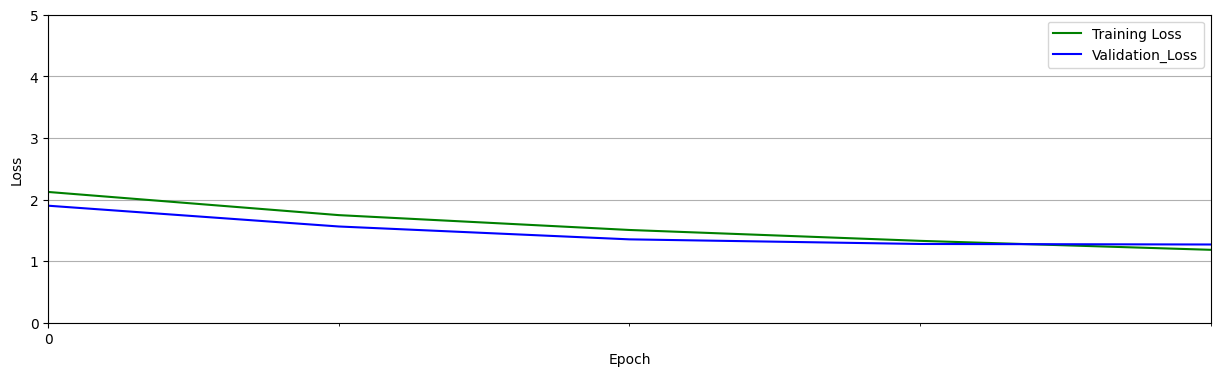

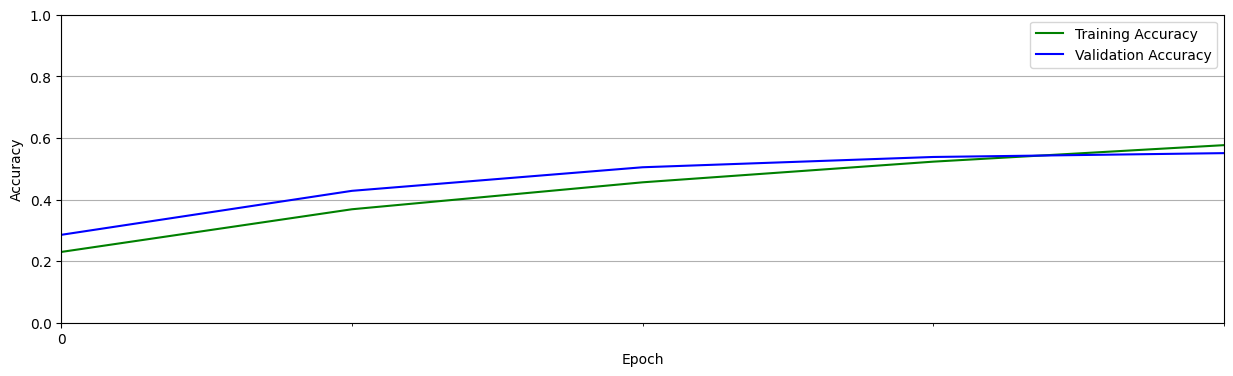

In [ ]:
train_loss=history.history["loss"]
train_acc=history.history["accuracy"]
valid_loss=history.history["val_loss"]
valid_acc=history.history["val_accuracy"]
plot_results([train_loss,valid_loss],
             ylabel="Loss",
             ylim=[0.0,5.0],
             metric_name=["Training Loss","Validation_Loss"],
             color=["g","b"]);
plot_results([train_acc,valid_acc],
             ylabel="Accuracy",
             ylim=[0.0,1.0],
             metric_name=["Training Accuracy","Validation Accuracy"],
             color=["g","b"])

In [ ]:
def cnn_model(input_shape=(32,32,3)):
  model = Sequential()
  model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=input_shape))
  model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
  model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
  model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(512,activation='relu'))
  model.add(Dropout(0.25))
  model.add(Dense(10,activation='softmax'))

  return model

In [ ]:
model_dropout=cnn_model()
model_dropout.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 64)        36928     
                                                      

In [ ]:
model_dropout.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'],
              )

In [ ]:
history=model_dropout.fit(X_train,
                      y_train,
                      batch_size=TrainingConfig.BATCH_SIZE,
                      epochs=TrainingConfig.EPOCHS,
                      verbose=1,
                      validation_split=.3,
                      )

Epoch 1/5
137/137 [==============================] - 218s 2s/step - loss: 1.2165 - accuracy: 0.5663 - val_loss: 1.1792 - val_accuracy: 0.5775
Epoch 2/5
137/137 [==============================] - 199s 1s/step - loss: 1.1363 - accuracy: 0.5949 - val_loss: 1.1361 - val_accuracy: 0.6076
Epoch 3/5
137/137 [==============================] - 216s 2s/step - loss: 1.0646 - accuracy: 0.6227 - val_loss: 0.9624 - val_accuracy: 0.6629
Epoch 4/5
137/137 [==============================] - 195s 1s/step - loss: 0.9942 - accuracy: 0.6502 - val_loss: 0.9430 - val_accuracy: 0.6703
Epoch 5/5
137/137 [==============================] - 197s 1s/step - loss: 0.9414 - accuracy: 0.6655 - val_loss: 1.1368 - val_accuracy: 0.6186


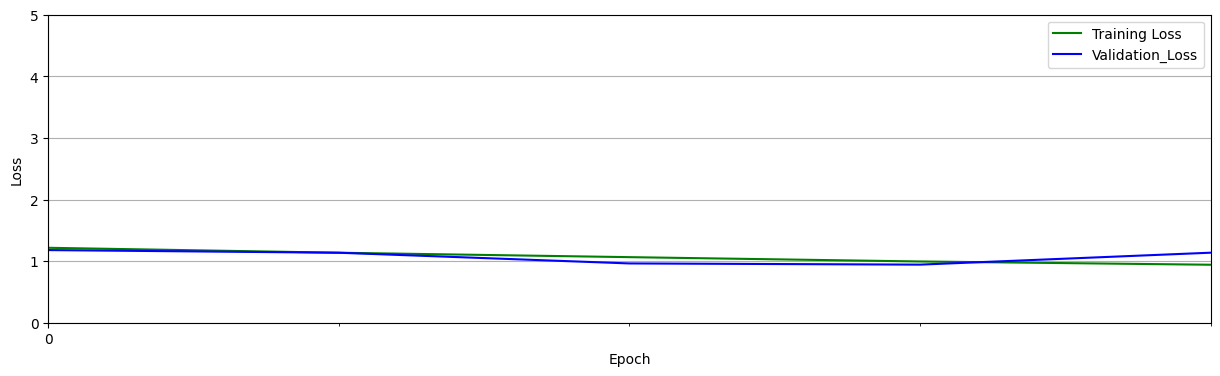

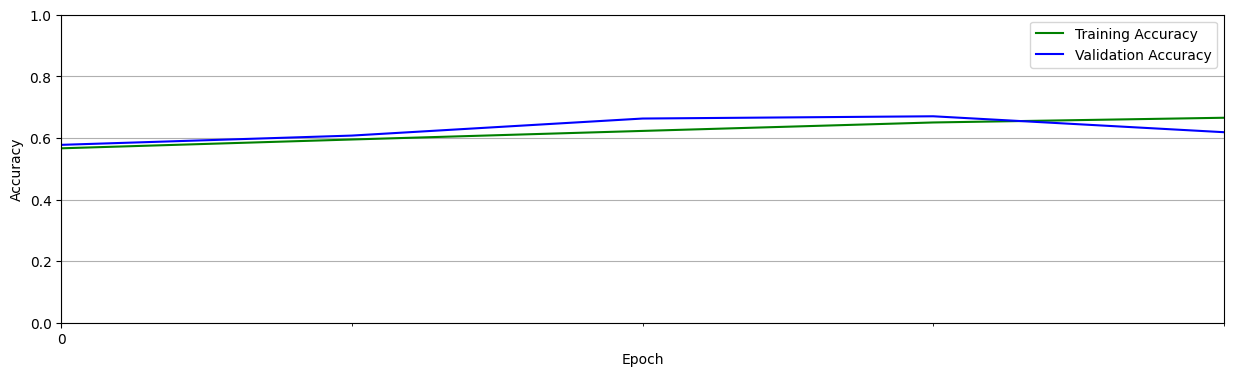

In [ ]:
train_loss=history.history["loss"]
train_acc=history.history["accuracy"]
valid_loss=history.history["val_loss"]
valid_acc=history.history["val_accuracy"]

plot_results([train_loss,valid_loss],
             ylabel="Loss",
             ylim=[0.0,5.0],
             metric_name=["Training Loss","Validation_Loss"],
             color=["g","b"]);
plot_results([train_acc,valid_acc],
             ylabel="Accuracy",
             ylim=[0.0,1.0],
             metric_name=["Training Accuracy","Validation Accuracy"],
             color=["g","b"])

In [ ]:
model_dropout.save('model_dropout')

In [ ]:
from tensorflow.keras import models
reloaded_model_dropout = models.load_model('model_dropout')

In [ ]:
test_loss,test_acc=reloaded_model_dropout.evaluate(X_test,y_test)
print(f"Test Accuracy:{test_acc*100:.3f}")

313/313 [==============================] - 15s 46ms/step - loss: 1.1364 - accuracy: 0.6160
Test Accuracy:61.600


In [ ]:
def evaluate_model(dataset,model):
  class_names=['airplane',
               'automobile',
               'bird',
               'cat',
               'deer',
               'dog',
               'frog',
               'horse',
               'ship',
               'truck']
  num_rows=3
  num_cols=6

  data_batch=dataset[0:num_rows*num_cols]
  labels_batch=dataset[num_rows*num_cols:]

  predictions=model.predict(data_batch)
  plt.figure(figsize=(20,8))
  num_matches=0
  for idx in range(num_rows*num_cols):
    ax=plt.subplot(num_rows,num_cols,idx+1)
    plt.axis("off")
    plt.imshow(data_batch[idx])
    pred_idx=tf.argmax(predictions[idx]).numpy()
    truth_idx=np.nonzero(y_test[idx])
    title=str(class_names[truth_idx[0][0]])+":"+str(class_names[pred_idx])
    title_obj=plt.title(title,fontdict={'fontsize':13})
    if pred_idx==truth_idx:
      num_matches+=1
      plt.setp(title_obj,color='g')
    else:
      plt.setp(title_obj,color='r')

      acc=num_matches/(idx+1)
  print("Prediction accuracy:",int(100*acc)/100)
  return

1/1 [==============================] - 0s 164ms/step
Prediction accuracy: 0.77


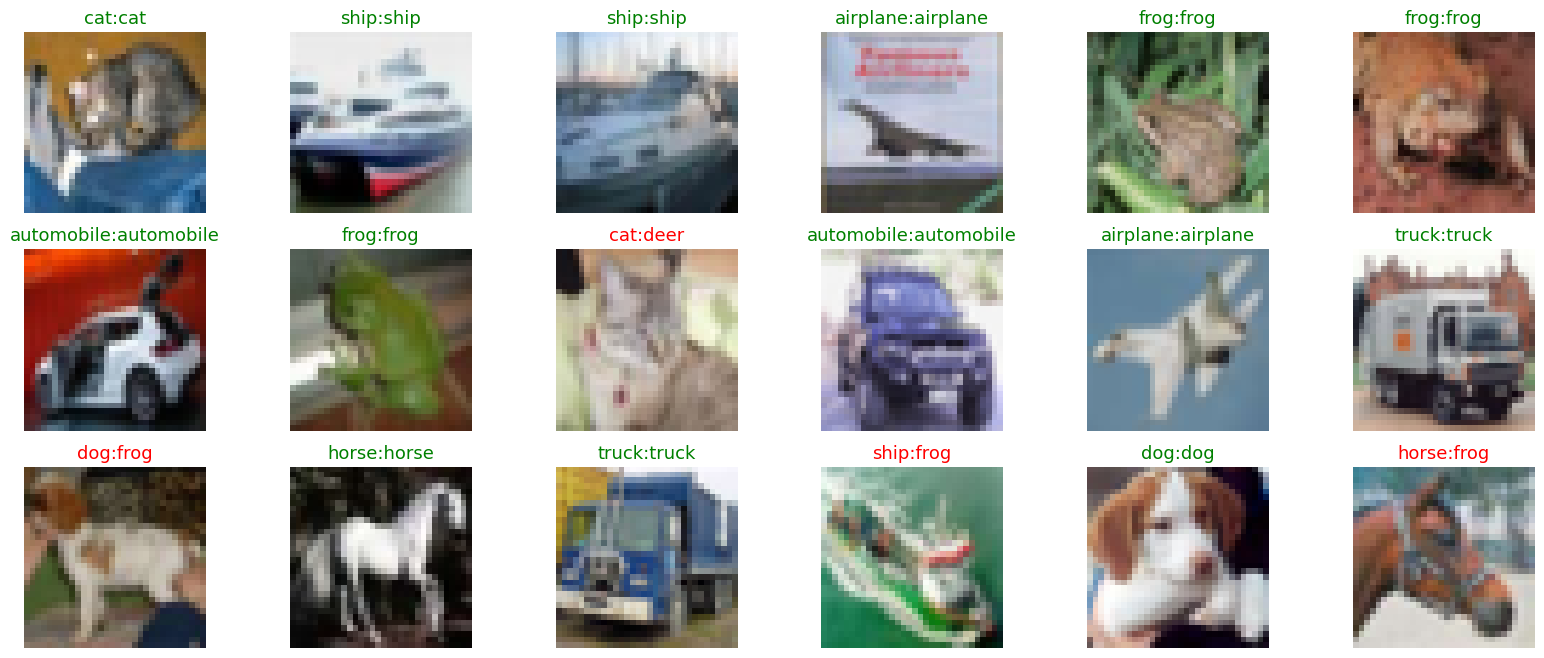

In [ ]:
evaluate_model(X_test,reloaded_model_dropout)

In [ ]:
predictions=reloaded_model_dropout.predict(X_test)

predicted_labels=[np.argmax(i) for i in predictions]

313/313 [==============================] - 14s 45ms/step


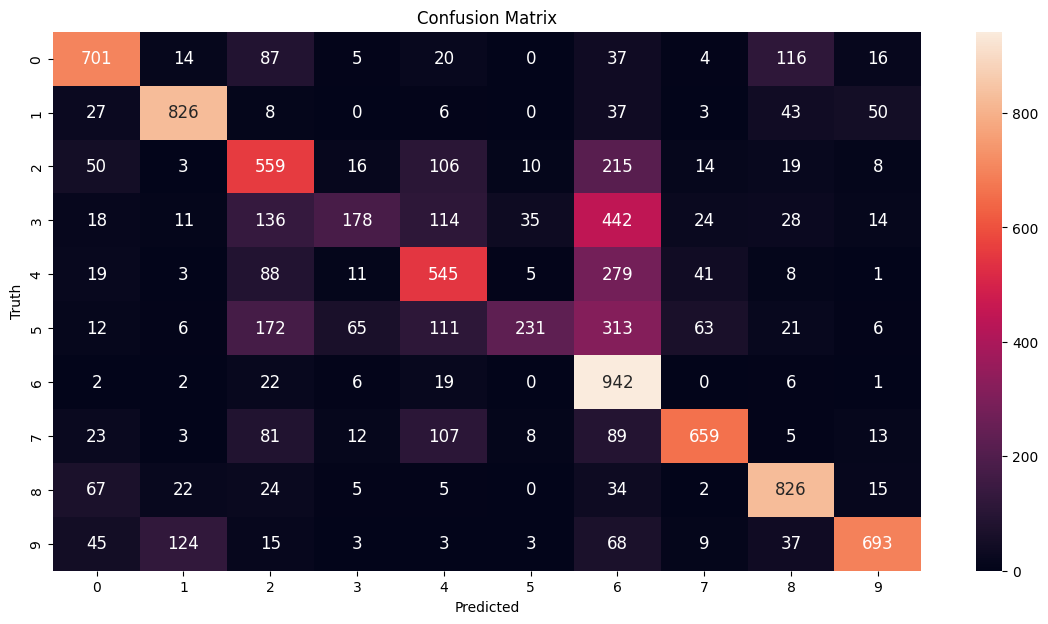

In [ ]:
y_test_integer_labels=tf.argmax(y_test,axis=1)

cm=tf.math.confusion_matrix(labels=y_test_integer_labels,predictions=predicted_labels)

plt.figure(figsize=[14,7])
import seaborn as sn
sn.heatmap(cm,annot=True,fmt='d',annot_kws={"size":12})
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()